In [10]:
'''
Name : KASARANENI SAI HEMANTH
Roll No: 14EE35011

Assignment 1b
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df= pd.read_csv('Iris_Data.csv')
df.head()

'''
You will not import any other library other than these provided.

We provide the iris_dataset for the classification task
There are 4 dependent variables columns(1-4).
The last column (category of the flower) is what we wish to predict

The first part of this task is similar to assignment 1 a
'''
# reads the file and stores in 2 numpy arrays.
# X has the input features and Y has the output value in numpy array

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

rows,cols= X.shape[0], X.shape[1] 
# how to get the number of rows and columns in the dataset.
# Rows correspond to the number of input instances, columns correspond to the feature of an input

print(rows,cols)

np.random.seed(42) # to ensure that the same seed is generated

# write code to shuffle the dataset'''

def shuffle_dataset(X,Y):
    
    '''
        Write code to shuffle the dataset here. 
        
        Args: 
            X: Input feature ndarray
            Y: Input values ndarray
            
        Return:
            X and Y shuffled in place
    
    '''
    assert len(X) == len(Y)
    rand_state = np.random.get_state()
    np.random.shuffle(X)
    np.random.set_state(rand_state)
    np.random.shuffle(Y)
    pass

training_size = int(0.8*rows)
shuffle_dataset(X,Y)
X_train = X[:training_size]
y_train = Y[:training_size]
X_test = X[training_size:]
y_test = Y[training_size:]

150 4



## Defining the Feed Forward Neural Network class

In [11]:
class NeuralNetwork(object):
    
    def __init__(self, input_no, hidden_no, output_no ):
        '''
            Initialize the Neural network model 
            Args:
                input_no : no of input features (no of cols)
                hidden_no: no of hidden nodes in the model
                output_no: no of categories our model can classify
                      
        
        '''
        np.random.seed(42)
        self.h=  np.zeros((training_size,hidden_no))# Initialize the hidden layer with zero ?
        self.w1= np.random.uniform(low = 0, high = 0.01, size = (input_no,hidden_no))# Initialize the weights from the input to the hidden layer uniformly with values between 0 and 0.01  ?
        self.b1= np.random.uniform(low = 0, high = 0.01, size = (hidden_no,))# Initialize the biases uniformly with values between 0 and 0.01 equal to the number of hidden nodes  ?
        self.w2= np.random.uniform(low = 0, high = 0.01, size = (hidden_no,output_no))# Initialize the weights from the hidden layer to the output uniformly with values between 0 and 0.01 ? 
        self.b2= np.random.uniform(low = 0, high = 0.01, size = (output_no,))# Initialize the biases uniformly with values between 0 and 0.01 equal to the number of output categories ?
        pass

    
    def forward(self, x):
        '''
            Do a forward pass on the NN model 
            Args: 
                x : Input feature matrix 
                
            Return:
                y_pred : list of predicted probabilities of x

                h= relu(w1.x+b1) 
                y_pred = softmax(w2.h+b2)
                
        
        '''
        self.h = np.maximum(np.dot(x,self.w1)+self.b1,0)
        temp = np.dot(self.h,self.w2) + self.b2
        y_pred = np.divide((np.exp(temp)).T , np.sum(np.exp(temp),axis = 1)).T
        return y_pred
        pass
    
    def backward(self, x, y_train, y_pred, lr):
        
        '''
            Do a backward pass on the NN model. 
            Computes all gradients and updates the parameters w1, b1, w2, b2
            
            Args:
                x: input matrix X 
                y_train: actual category of the feature/ data point
                y_pred: predicted probabilities of the categories obtained during forward pass
                lr: learning rate        
        '''
        m = y_train.shape[0]
        loss = crossEntropy_loss(y_pred,y_train)
        temp = np.copy(y_pred)
        temp[np.arange(m),y_train] -= 1
        temp /= m
        grad_b2 = np.sum(temp,axis = 0)
        grad_w2 = np.dot(self.h.T,temp)
        grad_h = np.dot(temp,self.w2.T)
        grad_h[self.h == 0] = 0
        grad_b1 = np.sum(grad_h,axis = 0)
        grad_w1 = np.dot(x.T,grad_h)
        self.w1 = self.w1 - lr*grad_w1
        self.b1 = self.b1 - lr*grad_b1
        self.w2 = self.w2 - lr*grad_w2
        self.b2 = self.b2 - lr*grad_b2
        pass
             

        
def crossEntropy_loss(y_pred, y_train):
    '''
        Computes the cross entropy loss between the predicted values and the actual values
        
        Args:
            y_pred: predicted probabilities of the categories obtained during forward pass
            y_train: actual category of the feature/ data point
    
    '''
    m = y_train.shape[0]
    temp = y_pred[np.arange(m),y_train]
    loss = np.sum(-np.log(temp))/m
    return loss
    pass

def accuracy(y_pred,y_train):
    '''
        Computes the accuracy between the predicted values and actual labels
    
        Args:
            y_pred: predicted probabilities of the categories obtained during forward pass
            y_train: actual category of the feature/ data point
 
    '''
    temp = np.argmax(y_pred,axis = 1) - y_train
    acc = 1-(np.count_nonzero(temp)/y_train.shape[0])
    return acc*100
    pass
        


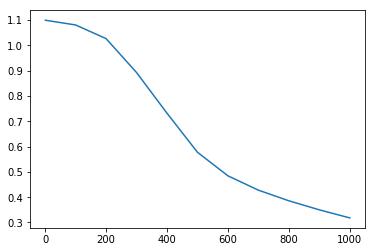

Final train_loss = 0.31771228852744837
Final train_accuracy = 96.66666666666667
Testloss = 0.34637825559636576
Test Accuracy = 100.0


In [21]:
# Initialize the neural network model and specify the parameters 
hidden_nodes = 256 #hyperparameter
nnobj= NeuralNetwork(cols,hidden_nodes,3)       
epochs = 1000
learning_rate = 1e-2
loss_history = []
epoch_history = []

# Gradient Descent
for e in range(epochs):
    yPred= nnobj.forward(X_train)
    nnobj.backward(X_train, y_train, yPred, lr=learning_rate)
    if e==0 or (e+1)%100==0:
        loss_history.append(crossEntropy_loss(yPred, y_train))
        epoch_history.append(e+1)
    
train_loss= crossEntropy_loss(nnobj.forward(X_train) , y_train)
train_accuracy= accuracy(nnobj.forward(X_train) , y_train)
test_loss= crossEntropy_loss(nnobj.forward(X_test) , y_test)
test_accuracy= accuracy(nnobj.forward(X_test) , y_test)

plt.plot(epoch_history, loss_history)
#plt.plot(epoch_history,testloss_history)
plt.show()
print("Final train_loss = "+ str(train_loss))    
print("Final train_accuracy = "+ str(train_accuracy))    
print("Testloss = " + str(test_loss))
print("Test Accuracy = "+ str(test_accuracy))            